## Importing all the important libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the data set

In [3]:
df = pd.read_csv("data_for_lr.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


# A little exploration of data

In [5]:
df.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [6]:
df.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [7]:
df.isnull().sum()

x    0
y    1
dtype: int64

## Dropping all the values

In [12]:
df = df.dropna()
print("The shape after dropping null is {}".format(df.shape))

The shape after dropping null is (699, 2)


## Splitting the data into train and test data

In [42]:
# Train data
train_input = np.array(df["x"][0:500]).reshape(500,1)
train_output = np.array(df["y"][0:500]).reshape(500,1)

# Test data
test_input = np.array(df["x"][500:]).reshape(199,1)
test_output = np.array(df["y"][500:]).reshape(199,1)

print("The shape of train_x is = {}".format(train_input.shape))
print("The shape of train_y is = {}".format(train_output.shape))
print("The shape of test_x is = {}".format(test_input.shape))
print("The shape of test_y is = {}".format(test_output.shape))



The shape of train_x is = (500, 1)
The shape of train_y is = (500, 1)
The shape of test_x is = (199, 1)
The shape of test_y is = (199, 1)


## 1. LINEAR REGRESSION

y = m*x + c

In [52]:
def forward_propagation(train_input,parameters):
    m = parameters["m"]
    c = parameters["c"]
    predictions = np.multiply(m,train_input) + c
    return predictions

## 1.1 Defining cost Function

cost_function = summation(0.5*((y-f(x))**2))

Our goal is to reduce the cost function so the error between the predicted value and the actual value


In [32]:
def cost_function(predictions,train_output):
    cost = np.mean(((predictions-train_output)**2))*0.5
    return cost
    

# 1.2 Gradient Descent for Propogation

Using Chain Rule:

cost
f = f(x)
Partial Derivative of cost function w.r.t m dcost/dm = dcost/df * df/dm

Partial Derivative of cost function w.r.t c dcost/dc = dcost/df * df/dc

Partial Derivatives:

dc/df = (y - f) * -1
df/dw = x
df/db = 1

In [57]:
def back_propagation(train_input,train_output,predictions):
    derivatives = dict()
    df = (train_output - predictions)*-1
    dm = np.mean(np.multiply(df,train_input))
    dc = np.mean(df)
    derivatives["dm"] = dm
    derivatives["dc"] = dc
    return derivatives

## 1.3 Updating the Parameters

1. m' = m - (learning_rate * dm)
2. c' = c - (learning_rate * dc)

In [66]:
def update_parameters(parameters,derivatives,learning_rate):
    parameters["m"] = parameters["m"] - (learning_rate * derivatives["dm"])
    parameters["c"] = parameters["c"] - (learning_rate * derivatives["dc"])
    return parameters

## 1.4 TRAINING THE DATA\
1. Splitting the data
2. Cost function
3. Gradient descent
4. update parameters

In [67]:
def train(train_input, train_output, learning_rate, iters):
    
    #random parameters
    parameters = dict()
    parameters["m"] = np.random.uniform(0,1) * -1
    parameters["c"] = np.random.uniform(0,1) * -1
    
    plt.figure()
    
    #loss
    loss = list()
    
    #iterate
    for i in range(iters):
        
        #forward propagation
        predictions = forward_propagation(train_input, parameters)
        
        #cost function
        cost = cost_function(predictions, train_output)
        
        #append loss and print
        loss.append(cost)
        print("Iteration = {}, Loss = {}".format(i+1, cost))
        
        #plot function
        fig, ax = plt.subplots()
        
        ax.plot(train_input, train_output, '+', label='Original')
        ax.plot(train_input, predictions, '*', label='Training')

        legend = ax.legend()
        
        plt.plot(train_input, train_output, '+')
        plt.plot(train_input, predictions, '*')        
        
        plt.show()
        
        #back propagation
        derivatives = back_propagation(train_input, train_output, predictions)
        
        #update parameters
        parameters = update_parameters(parameters, derivatives, learning_rate)
        
    return parameters, loss
    

Iteration = 1, Loss = 4663.255585389173


<Figure size 640x480 with 0 Axes>

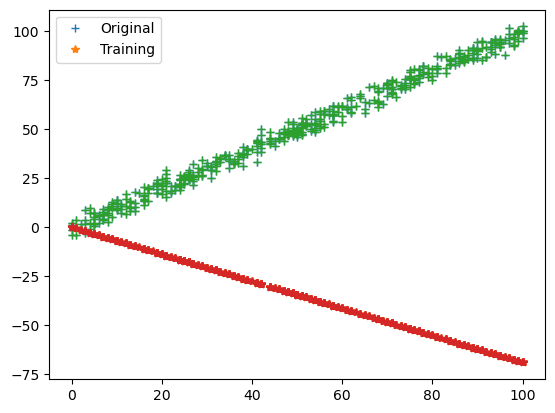

Iteration = 2, Loss = 2117.864100853006


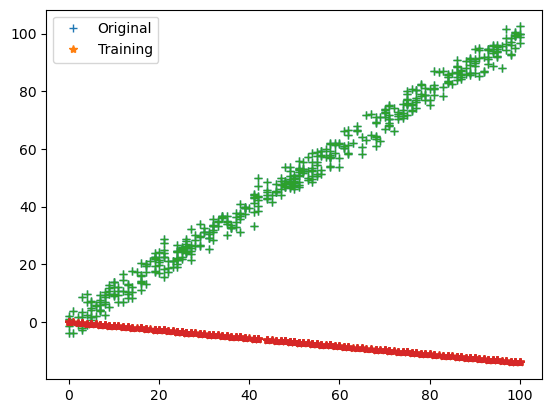

Iteration = 3, Loss = 963.0171647545183


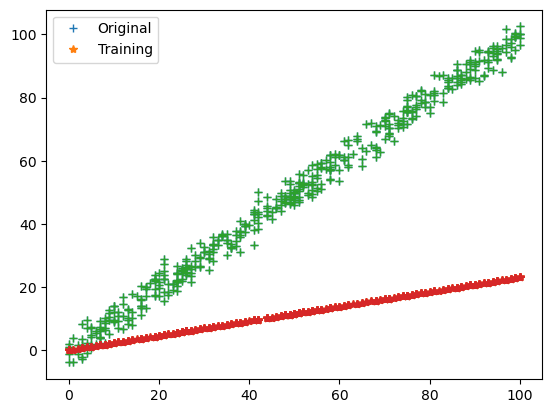

Iteration = 4, Loss = 439.06183050666596


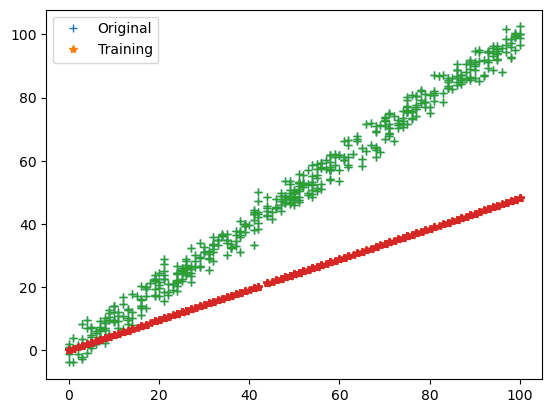

Iteration = 5, Loss = 201.34271481999616


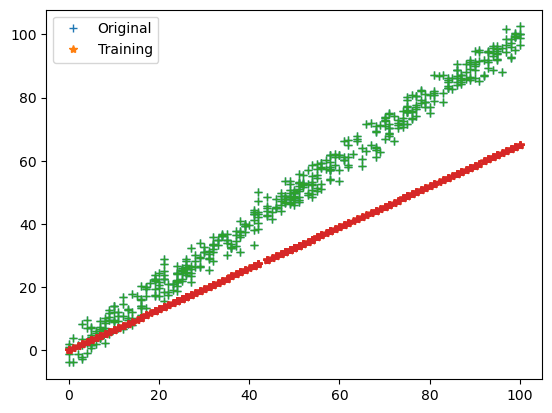

Iteration = 6, Loss = 93.48928854157677


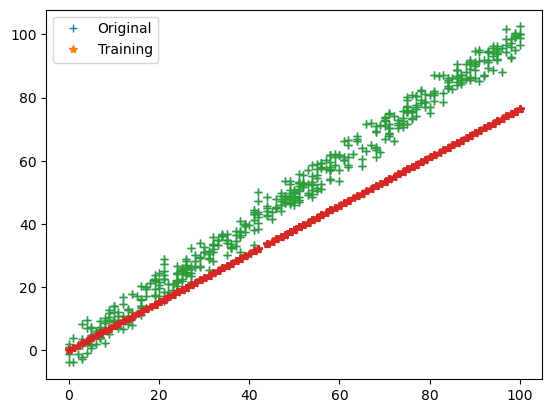

Iteration = 7, Loss = 44.55606939227966


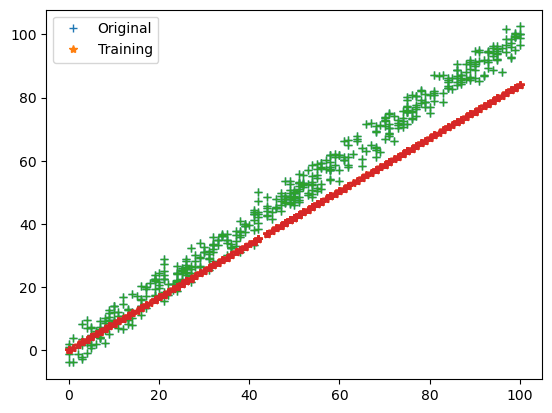

Iteration = 8, Loss = 22.355013479924455


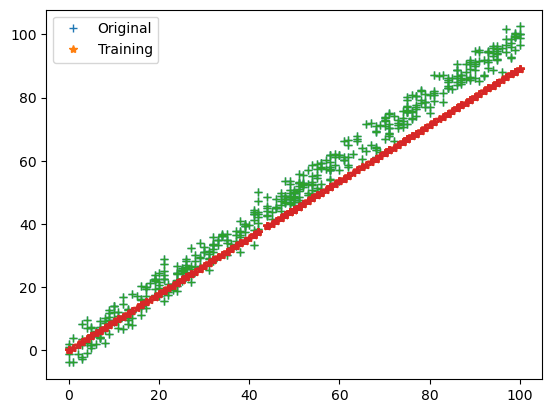

Iteration = 9, Loss = 12.28236963782477


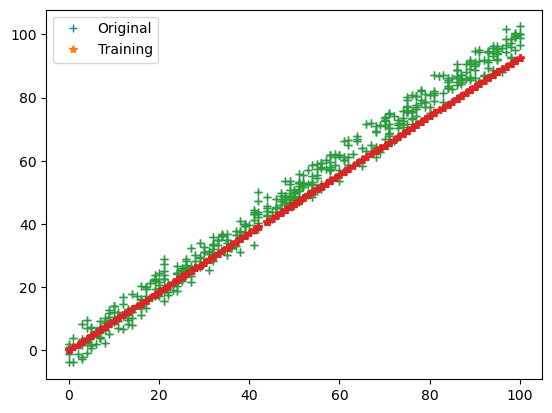

Iteration = 10, Loss = 7.712399785938313


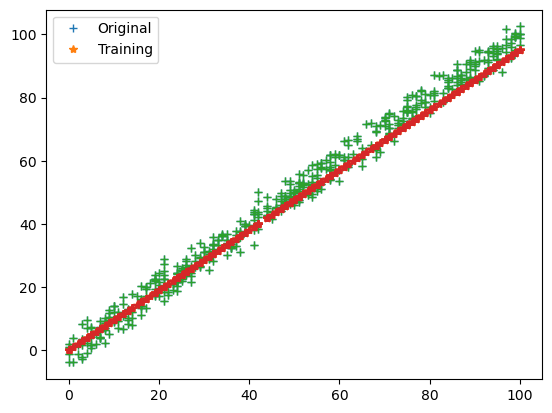

Iteration = 11, Loss = 5.638999218409384


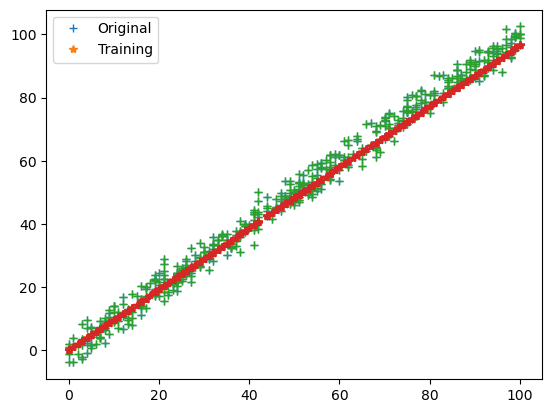

Iteration = 12, Loss = 4.698294900505756


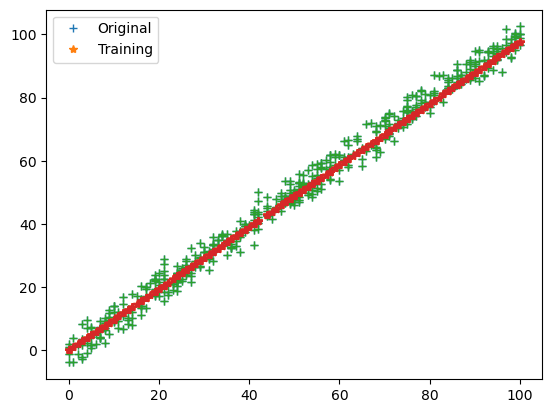

Iteration = 13, Loss = 4.2714961256874435


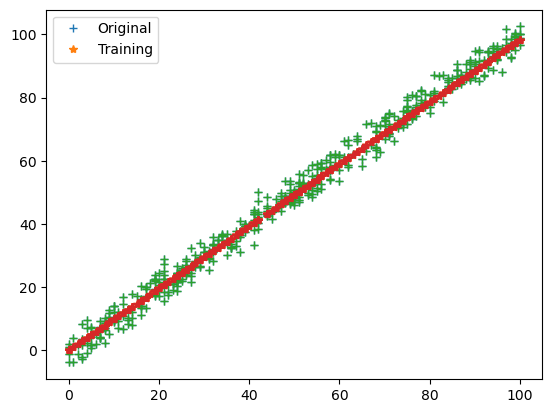

Iteration = 14, Loss = 4.077856864999153


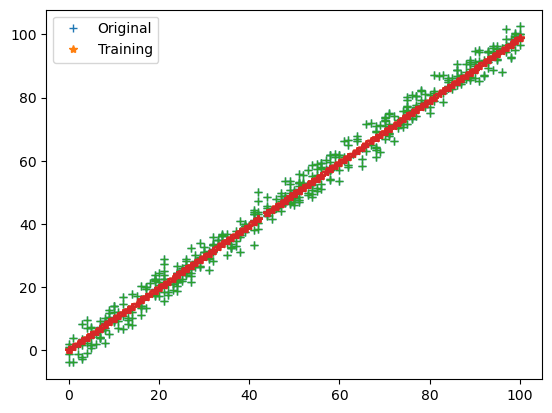

Iteration = 15, Loss = 3.9900023341379947


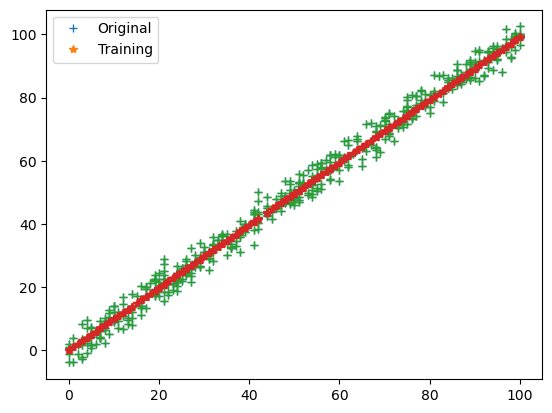

Iteration = 16, Loss = 3.9501424523802005


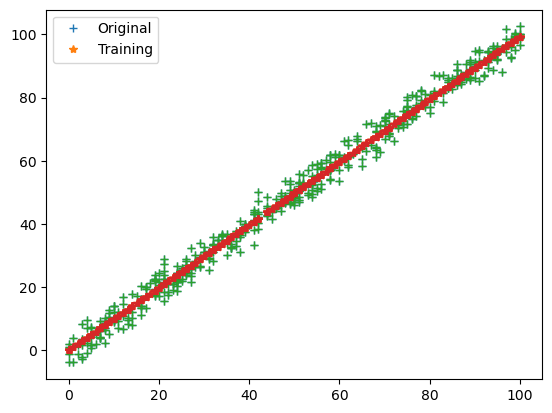

Iteration = 17, Loss = 3.9320577960907053


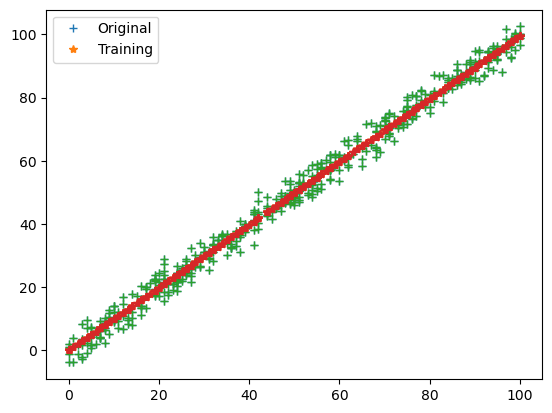

Iteration = 18, Loss = 3.9238525837245763


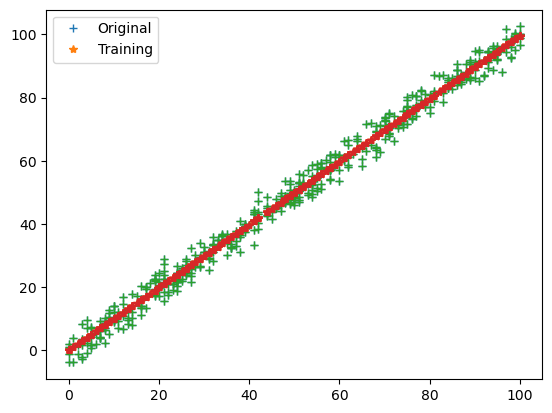

Iteration = 19, Loss = 3.920129686018614


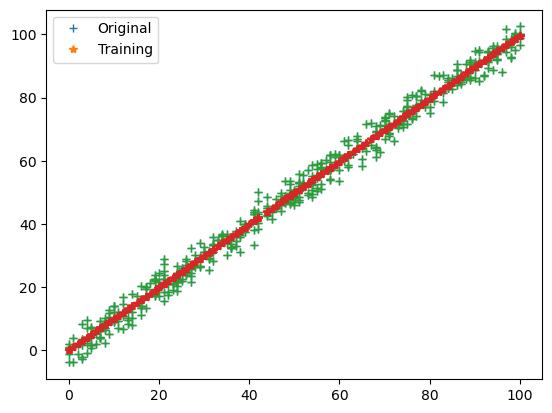

Iteration = 20, Loss = 3.918440419448022


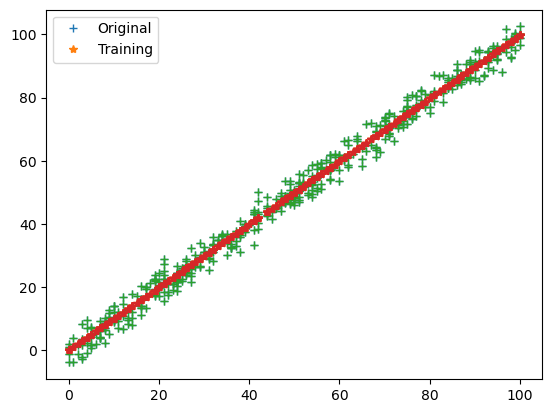

In [71]:
parameters , loss = train(train_input,train_output,0.0001,20)

In [72]:
print(parameters)

{'m': 0.996888885567879, 'c': -0.005808807906774313}


## Now lets do the Prediction

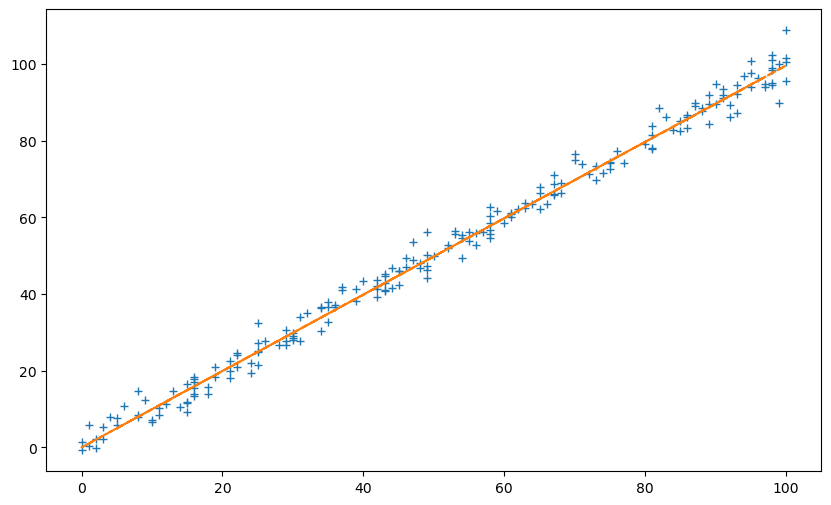

In [76]:
test_predictions = test_input * parameters["m"] + parameters["c"]
plt.figure(figsize=(10,6))
plt.plot(test_input,test_output,"+")
plt.plot(test_input,test_predictions,"--")
plt.show()

In [78]:
# Cost for test Data
cost = cost_function(test_output,test_predictions)

In [79]:
cost

4.008740551357541